In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the 'train.csv' file and the 'test.csv' file.

In [219]:
train_file = 'train.csv'
train_data = pd.read_csv(train_file)

test_file = 'test.csv'
test_data = pd.read_csv(test_file)

Preview the train dataset.

In [220]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analyze the features of the dataset

In [221]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [222]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [223]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [224]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Survived',
ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [226]:
train_data[['Sex', 'Survived']].groupby(['Sex'], 
as_index=False).mean().sort_values(by='Survived',
ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [227]:
train_data[["Parch", "Survived"]].groupby(['Parch'], 
as_index=False).mean().sort_values(by='Survived', 
ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [228]:
import seaborn as sns
%matplotlib inline

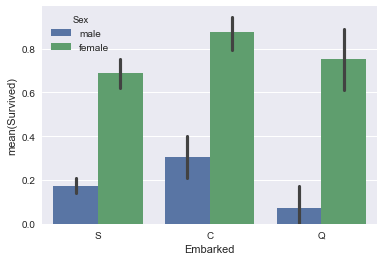

In [229]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_data);


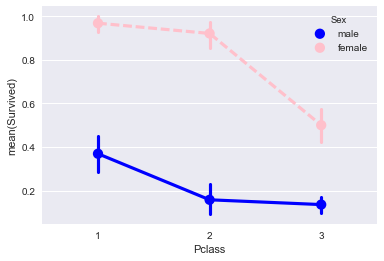

In [230]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_data,
                 palette={"male": "blue", "female": "pink"},
                 Markers=["*", "o"], linestyles=["-", "--"]);

In [231]:
#Simplify the Age category into specific age-groups; fill in missing values;

def simplify_ages(df):
    
    #Fill the missing values with a value of -0.5.
    df.Age = df.Age.fillna(-0.5)
    
    '''
    Group the ages into specific age-groups in order to
    change the continuous variable into a discrete one.
    The numbers represent the endpoints of each age in
    this manner: (left, right] -- for example, if you're
    18 years old, you would be a Teenager, because the 
    age-group for a teenager is (12, 18].
    '''
    
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager',
                  'Student', 'YoungAdult', 'Adult', 'Senior']
    
    
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

#Simplify the Cabin category; The numbers following the the letters for the Cabin is probably 
#insignificant so cuf off the numbers; fill in missing values;

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna("N")
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

#Group Fare into categories; the bins will the the quartiles of the fare price we found by using describe() function;
#25% - 7.9, 50% - 14.5, 75% - 31, max - 512;

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 14.5, 31, 600)
    group_names = ['Unknown', '1st_Q', '2nd_Q', '3rd_Q', '4th_Q']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df


#Reformat the Name category; Store last name and title in a separate category

def reformat_name(df):
    df['LastName'] = df.Name.apply(lambda x: x.split()[0][:len(x.split()[0]) - 1])
    df['Title'] = df.Name.apply(lambda x: x.split()[1])
    return df

#Drop useless features;

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

In [232]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = reformat_name(df)
    df = drop_features(df)
    
    return df

In [233]:
train_data = transform_features(train_data)
test_data = transform_features(test_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,Title
0,1,0,3,male,Student,1,0,1st_Q,N,Braund,Mr.
1,2,1,1,female,Adult,1,0,4th_Q,C,Cumings,Mrs.
2,3,1,3,female,YoungAdult,0,0,1st_Q,N,Heikkinen,Miss.
3,4,1,1,female,YoungAdult,1,0,4th_Q,C,Futrelle,Mrs.
4,5,0,3,male,YoungAdult,0,0,2nd_Q,N,Allen,Mr.


In [234]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,Title
0,1,0,3,male,Student,1,0,1st_Q,N,Braund,Mr.
1,2,1,1,female,Adult,1,0,4th_Q,C,Cumings,Mrs.
2,3,1,3,female,YoungAdult,0,0,1st_Q,N,Heikkinen,Miss.
3,4,1,1,female,YoungAdult,1,0,4th_Q,C,Futrelle,Mrs.
4,5,0,3,male,YoungAdult,0,0,2nd_Q,N,Allen,Mr.
5,6,0,3,male,Unknown,0,0,2nd_Q,N,Moran,Mr.
6,7,0,1,male,Adult,0,0,4th_Q,E,McCarthy,Mr.
7,8,0,3,male,Baby,3,1,3rd_Q,N,Palsson,Master.
8,9,1,3,female,YoungAdult,0,2,2nd_Q,N,Johnson,Mrs.
9,10,1,2,female,Teenager,1,0,3rd_Q,N,Nasser,Mrs.


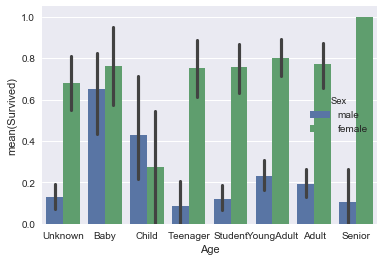

In [235]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train_data)

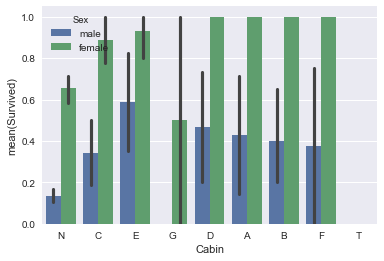

In [236]:
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=train_data)

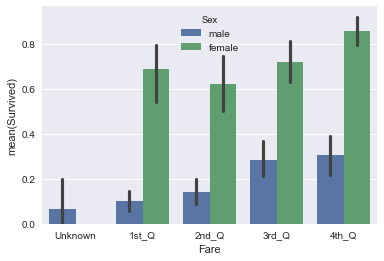

In [237]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=train_data)

In [241]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'LastName', 'Title']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train_data, test_data = encode_features(train_data, test_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,Title
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19
